This notebook explore the qvalue results, in response to reviewer comments which requested that we look into abundance (not just presence) of OTUs.

In [141]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Note: we're using Kruskal-Wallis instead of `scipy.stats.ranksums` because the ranksums function does not handle ties. When I run the test using that function, I get p-value histograms that are highly skewed toward 1 ([indicating that something is wrong](http://varianceexplained.org/statistics/interpreting-pvalue-histogram/)).

# Aspiration

In [2]:
fqval = '../../data/analysis/qvalues.kruskal_wallis.txt'

df = pd.read_csv(fqval, sep='\t')
df.head()

,otu,test-stat,p,q,site,n_asp,n_nml,total_taxa,level
0,k__Bacteria;p__Firmicutes;c__Negativicutes;o__...,2.914605e-01,0.589286,0.800670,bal,33,33,928,otu
1,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,5.672764e-01,0.451343,0.740012,bal,33,33,928,otu
2,k__Bacteria;p__Actinobacteria;c__Actinobacteri...,9.615313e-04,0.975263,1.000000,bal,33,33,928,otu
3,k__Bacteria;p__Proteobacteria;c__Betaproteobac...,3.102748e+00,0.078160,0.591293,bal,33,33,928,otu
4,k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacill...,-1.661633e-13,1.000000,1.000000,bal,33,33,928,otu


In [3]:
# Minimum p-value for all levels
df.groupby(['level', 'site'])['p'].min()

level  site         
genus  bal              0.002129
       gastric_fluid    0.002082
       throat_swab      0.004725
otu    bal              0.002617
       gastric_fluid    0.000146
       throat_swab      0.000489
Name: p, dtype: float64

In [4]:
# Minimum q-value for all levels
df.groupby(['level', 'site'])['q'].min()

level  site         
genus  bal              0.233043
       gastric_fluid    0.347076
       throat_swab      0.273474
otu    bal              0.591293
       gastric_fluid    0.113964
       throat_swab      0.183992
Name: q, dtype: float64

Nothing is signficant. Note that here I corrected for multiple hypotheses _within_ each test (i.e. each groupby'ed row in the table above). Not sure what the correct way to do it is, but if they're not significant with this type of correction, they won't be significant with more stringent correction (i.e. correcting _all_ of them afterwards).

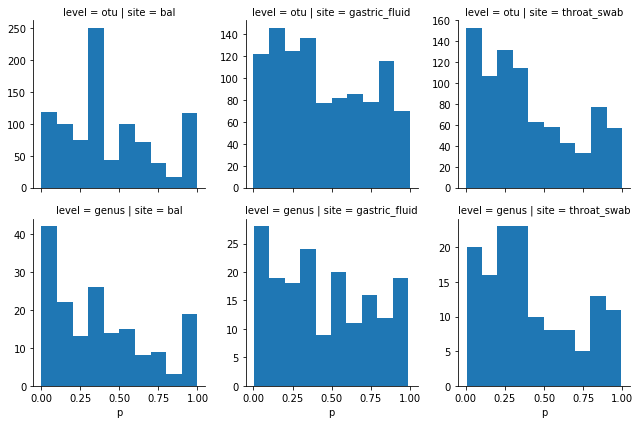

In [5]:
g = sns.FacetGrid(data=df, col='site', row='level', sharey=False)
g.map(plt.hist, 'p')

We'll put this figure in the reviewer response, and include the q-values as a supplementary file.

# PPI

In [115]:
fqval = '../../data/analysis/qvalues.kruskal_wallis.ppi.txt'

df = pd.read_csv(fqval, sep='\t')
df = df.rename(columns={'n_asp': 'n_on_ppi', 'n_nml': 'n_off_ppi'})
df.head()

,otu,test-stat,p,q,site,n_on_ppi,n_off_ppi,total_taxa,level
0,k__Bacteria;p__Firmicutes;c__Negativicutes;o__...,0.443526,0.505425,0.793643,bal,55,46,950,otu
1,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,0.001427,0.969870,0.982379,bal,55,46,950,otu
2,k__Bacteria;p__Actinobacteria;c__Actinobacteri...,1.455403,0.227663,0.701001,bal,55,46,950,otu
3,k__Bacteria;p__Proteobacteria;c__Betaproteobac...,2.243995,0.134134,0.701001,bal,55,46,950,otu
4,k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacill...,1.515465,0.218307,0.701001,bal,55,46,950,otu


In [116]:
# Minimum q-value for all levels
df.groupby(['level', 'site', 'n_on_ppi', 'n_off_ppi'])['q'].min()

level  site           n_on_ppi  n_off_ppi
genus  bal            55        46           0.874546
       gastric_fluid  76        69           0.524898
       rectal_swab    3         6            0.465670
       stool          1         24           0.054939
       throat_swab    85        90           0.008479
otu    bal            55        46           0.701001
       gastric_fluid  76        69           0.123987
       rectal_swab    3         6            0.527310
       stool          1         24           0.386197
       throat_swab    85        90           0.000702
Name: q, dtype: float64

In [117]:
#g = sns.FacetGrid(data=df, col='site', row='level', sharey=False)
#g.map(plt.hist, 'p')

In [118]:
cols = ['level', 'site', 'n_on_ppi', 'n_off_ppi']
df['sig'] = df['q'] < 0.05
df.groupby(cols)['sig'].sum()

level  site           n_on_ppi  n_off_ppi
genus  bal            55        46           0.0
       gastric_fluid  76        69           0.0
       rectal_swab    3         6            0.0
       stool          1         24           0.0
       throat_swab    85        90           3.0
otu    bal            55        46           0.0
       gastric_fluid  76        69           0.0
       rectal_swab    3         6            0.0
       stool          1         24           0.0
       throat_swab    85        90           6.0
Name: sig, dtype: float64

In [119]:
df.query('sig == True')

,otu,test-stat,p,q,site,n_on_ppi,n_off_ppi,total_taxa,level,sig
4427,k__Bacteria;p__Firmicutes;c__Erysipelotrichia;...,13.945707,1.881669e-04,0.041616,throat_swab,85,90,1327,otu,True
4732,k__Bacteria;p__Firmicutes;c__Negativicutes;o__...,25.153988,5.293008e-07,0.000702,throat_swab,85,90,1327,otu,True
4812,k__Bacteria;p__Firmicutes;c__Negativicutes;o__...,16.422494,5.068023e-05,0.031068,throat_swab,85,90,1327,otu,True
4819,k__Bacteria;p__Actinobacteria;c__Actinobacteri...,15.260600,9.364969e-05,0.031068,throat_swab,85,90,1327,otu,True
5164,k__Bacteria;p__Actinobacteria;c__Actinobacteri...,15.271629,9.310447e-05,0.031068,throat_swab,85,90,1327,otu,True
5329,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,14.082449,1.749688e-04,0.041616,throat_swab,85,90,1327,otu,True
6027,k__Bacteria;p__Firmicutes;c__Negativicutes;o__...,16.422494,5.068023e-05,0.008479,throat_swab,85,90,170,genus,True
6071,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,13.136260,2.896354e-04,0.016413,throat_swab,85,90,170,genus,True
6175,k__Bacteria;p__Actinobacteria;c__Actinobacteri...,15.141481,9.974739e-05,0.008479,throat_swab,85,90,170,genus,True


## Plot abundance of the significant OTUs, split by aspiration status.

In [120]:
otudf = pd.read_csv('../../data/clean/rosen.otu_table.rel_abun.clean', sep='\t', index_col=0)
otudf.head()

,k__Bacteria;p__Firmicutes;c__Negativicutes;o__Selenomonadales;f__Acidaminococcaceae;g__Phascolarctobacterium;s__;d__denovo58,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiales_Incertae_Sedis_XIII;g__Anaerovorax;s__;d__denovo1106,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Ruminococcus2;s__;d__denovo57,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces;s__;d__denovo886,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__;s__;d__denovo887,k__Bacteria;p__Proteobacteria;c__Betaproteobacteria;o__Neisseriales;f__Neisseriaceae;g__Neisseria;s__;d__denovo884,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__;d__denovo885,k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Bacillales_Incertae_Sedis_XI;g__Gemella;s__;d__denovo882,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Micrococcaceae;g__Rothia;s__;d__denovo883,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__;s__;d__denovo880,...,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Clostridium_XlVa;s__;d__denovo701,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Clostridium_IV;s__;d__denovo954,k__Bacteria;p__Fusobacteria;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae;g__Fusobacterium;s__;d__denovo955,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Pseudoflavonifractor;s__;d__denovo950,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae;g__Barnesiella;s__;d__denovo951,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Lachnospiracea_incertae_sedis;s__;d__denovo952,k__Bacteria;p__Fusobacteria;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae;g__Fusobacterium;s__;d__denovo953,k__Bacteria;p__Firmicutes;c__;o__;f__;g__;s__;d__denovo958,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Prevotellaceae;g__Prevotella;s__;d__denovo959,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pasteurellales;f__Pasteurellaceae;g__Haemophilus;s__;d__denovo2432
01-112-7GI,0.025542,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000070,...,0.000000,0.000033,0.000000,0.000000,0.0,0.000015,0.000000,0.0,0.0,0.0
01-112-7RI,0.013652,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000415,...,0.000000,0.000226,0.000000,0.000000,0.0,0.000004,0.000000,0.0,0.0,0.0
01-112-7TI,0.000000,0.0,0.0,0.000048,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000024,0.0,0.0,0.0
01-164-7GI,0.000011,0.0,0.0,0.000224,0.0,0.0,0.000078,0.0,0.0,0.000000,...,0.000000,0.000000,0.000022,0.000000,0.0,0.000000,0.000034,0.0,0.0,0.0
01-164-7RI,0.010690,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000138,0.000000,0.000000,0.000041,0.0,0.000000,0.000000,0.0,0.0,0.0


In [121]:
# Grab significant OTUs
otus = df.query('sig == True').query('level == "otu"')['otu'].values

In [122]:
# Tidyfy the OTU table (just keeping these otus in the throat swabs)
tidyotu = (
    otudf[otus]
    .reset_index()
    .melt(id_vars='index', var_name='otu', value_name='abun')
    .rename(columns={'index': 'sample'})
)
meta = pd.read_csv('../../data/clean/rosen.clinical_metadata.clean', sep='\t')
tidyotu = pd.merge(tidyotu, meta, left_on='sample', right_on='sample_id')
tidyotu['mbs_consolidated'] = tidyotu['mbs_consolidated'].fillna('nan')

tidyotu = tidyotu.query('site == "throat_swab"')

tidyotu.head()

,sample,otu,abun,sample_id,subject_id,site,mbs_consolidated,age,gender_all,abx_all,...,foodup_all,chest_pain_all,asthma_all,chronic_cough_all,pneum_all,ear_inf_all,sinus_inf_all,pgsq_symp_all,pgsq_total_all,metadata_id
12,01-112-7TI,k__Bacteria;p__Firmicutes;c__Erysipelotrichia;...,0.000000,01-112-7TI,01-112-7,throat_swab,nan,1.09589,M,0,...,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.53,0.48,r01_baseline_v2
13,01-112-7TI,k__Bacteria;p__Firmicutes;c__Negativicutes;o__...,0.000000,01-112-7TI,01-112-7,throat_swab,nan,1.09589,M,0,...,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.53,0.48,r01_baseline_v2
14,01-112-7TI,k__Bacteria;p__Firmicutes;c__Negativicutes;o__...,0.017609,01-112-7TI,01-112-7,throat_swab,nan,1.09589,M,0,...,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.53,0.48,r01_baseline_v2
15,01-112-7TI,k__Bacteria;p__Actinobacteria;c__Actinobacteri...,0.009283,01-112-7TI,01-112-7,throat_swab,nan,1.09589,M,0,...,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.53,0.48,r01_baseline_v2
16,01-112-7TI,k__Bacteria;p__Actinobacteria;c__Actinobacteri...,0.014858,01-112-7TI,01-112-7,throat_swab,nan,1.09589,M,0,...,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.53,0.48,r01_baseline_v2


/Users/claire/anaconda/envs/aspiration/lib/python2.7/site-packages/seaborn/categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/claire/anaconda/envs/aspiration/lib/python2.7/site-packages/seaborn/categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/claire/anaconda/envs/aspiration/lib/python2.7/site-packages/seaborn/categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/claire/anaconda/envs/aspiration/lib/python2.7/site-packages/seaborn/categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/claire/anaconda/envs/aspiration/lib/python2.7/site-packages/seaborn/categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/claire/anaconda/envs/as

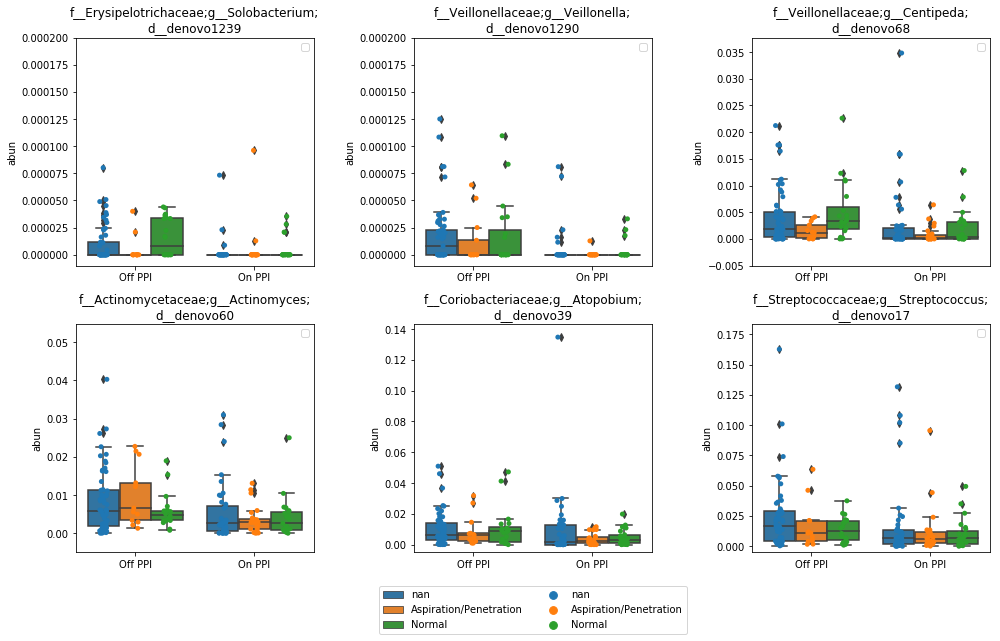

In [123]:
fig, ax = plt.subplots(2, len(otus)/2, figsize=(14, 9))
ax = ax.flatten()

asp_order = ['nan', 'Aspiration/Penetration', 'Normal']

i = 0
for o in otus:
    tmpdf = tidyotu.query('otu == @o')
    sns.stripplot(data=tmpdf, x='ppi_all', y='abun',
                  hue='mbs_consolidated', split=True,
                  ax=ax[i], hue_order=asp_order)
    sns.boxplot(data=tmpdf, x='ppi_all', y='abun',
                  hue='mbs_consolidated',
                  ax=ax[i], hue_order=asp_order)

    if i == 4:
        ax[i].legend(loc='upper center', bbox_to_anchor=(0.5, -0.125), ncol=2)
    else:
        ax[i].legend([])

    if i in [0, 1]:
        ax[i].set_ylim([-0.00001, 0.0002])
    else:
        ax[i].set_ylim([-0.005, None])
    
    ax[i].set_xlabel('')
    ax[i].set_xticklabels(['Off PPI', 'On PPI'])
    
    o_label = '\n'.join(o.split(';', 4)[-1].split('s__;'))
    ax[i].set_title(o_label)
    
    i += 1

fig.tight_layout()

# Inhaled steroids

In [124]:
fqval = '../../data/analysis/qvalues.kruskal_wallis.inhaled_steroids.txt'

df = pd.read_csv(fqval, sep='\t')
df = df.rename(columns={'n_asp': 'n_on_steroids', 'n_nml': 'n_off_steroids'})
df.head()

,otu,test-stat,p,q,site,n_on_steroids,n_off_steroids,total_taxa,level
0,k__Bacteria;p__Firmicutes;c__Negativicutes;o__...,0.007123,0.932740,0.962110,bal,71,30,950,otu
1,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,0.394107,0.530148,0.839175,bal,71,30,950,otu
2,k__Bacteria;p__Actinobacteria;c__Actinobacteri...,0.284976,0.593458,0.873694,bal,71,30,950,otu
3,k__Bacteria;p__Proteobacteria;c__Betaproteobac...,0.553153,0.457032,0.839175,bal,71,30,950,otu
4,k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacill...,0.039184,0.843084,0.947357,bal,71,30,950,otu


In [125]:
# Minimum q-value for all levels
df.groupby(['level', 'site', 'n_on_steroids', 'n_off_steroids'])['q'].min()

level  site           n_on_steroids  n_off_steroids
genus  bal            71             30                0.143815
       gastric_fluid  102            43                0.258602
       rectal_swab    3              6                 0.888129
       stool          9              16                0.449919
       throat_swab    106            69                0.007861
otu    bal            71             30                0.789736
       gastric_fluid  102            43                0.717930
       rectal_swab    3              6                 0.693107
       stool          9              16                0.623113
       throat_swab    106            69                0.056878
Name: q, dtype: float64

In [126]:
cols = ['level', 'site', 'n_on_steroids', 'n_off_steroids']
df['sig'] = df['q'] < 0.05
df.groupby(cols)['sig'].sum()

level  site           n_on_steroids  n_off_steroids
genus  bal            71             30                0.0
       gastric_fluid  102            43                0.0
       rectal_swab    3              6                 0.0
       stool          9              16                0.0
       throat_swab    106            69                9.0
otu    bal            71             30                0.0
       gastric_fluid  102            43                0.0
       rectal_swab    3              6                 0.0
       stool          9              16                0.0
       throat_swab    106            69                0.0
Name: sig, dtype: float64

In [127]:
# add util/ to path so I can get the collapse function
import os, sys
src_dir = os.path.normpath(os.path.join(os.getcwd(), '../../src/util'))
sys.path.append(src_dir)
import util

In [128]:
genusdf = util.collapse_taxonomic_contents_df(otudf, 'genus')

In [129]:
# Grab significant OTUs
genera = df.query('sig == True').query('level == "genus"')['otu'].values

In [130]:
# Tidyfy the OTU table (just keeping these otus in the throat swabs)
tidygenus = (
    genusdf[genera]
    .reset_index()
    .melt(id_vars='index', var_name='genus', value_name='abun')
    .rename(columns={'index': 'sample'})
)
tidygenus = pd.merge(tidygenus, meta, left_on='sample', right_on='sample_id')
tidygenus['mbs_consolidated'] = tidyotu['mbs_consolidated'].fillna('nan')

tidygenus = tidygenus.query('site == "throat_swab"')

tidygenus.head()

,sample,genus,abun,sample_id,subject_id,site,mbs_consolidated,age,gender_all,abx_all,...,foodup_all,chest_pain_all,asthma_all,chronic_cough_all,pneum_all,ear_inf_all,sinus_inf_all,pgsq_symp_all,pgsq_total_all,metadata_id
18,01-112-7TI,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,0.000024,01-112-7TI,01-112-7,throat_swab,NaN,1.09589,M,0,...,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.53,0.48,r01_baseline_v2
19,01-112-7TI,k__Bacteria;p__Firmicutes;c__Negativicutes;o__...,0.006125,01-112-7TI,01-112-7,throat_swab,NaN,1.09589,M,0,...,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.53,0.48,r01_baseline_v2
20,01-112-7TI,k__Bacteria;p__Actinobacteria;c__Actinobacteri...,0.000024,01-112-7TI,01-112-7,throat_swab,NaN,1.09589,M,0,...,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.53,0.48,r01_baseline_v2
21,01-112-7TI,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,0.000000,01-112-7TI,01-112-7,throat_swab,NaN,1.09589,M,0,...,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.53,0.48,r01_baseline_v2
22,01-112-7TI,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,0.000024,01-112-7TI,01-112-7,throat_swab,NaN,1.09589,M,0,...,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.53,0.48,r01_baseline_v2


/Users/claire/anaconda/envs/aspiration/lib/python2.7/site-packages/seaborn/categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/claire/anaconda/envs/aspiration/lib/python2.7/site-packages/seaborn/categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/claire/anaconda/envs/aspiration/lib/python2.7/site-packages/seaborn/categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/claire/anaconda/envs/aspiration/lib/python2.7/site-packages/seaborn/categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/claire/anaconda/envs/aspiration/lib/python2.7/site-packages/seaborn/categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/claire/anaconda/envs/as

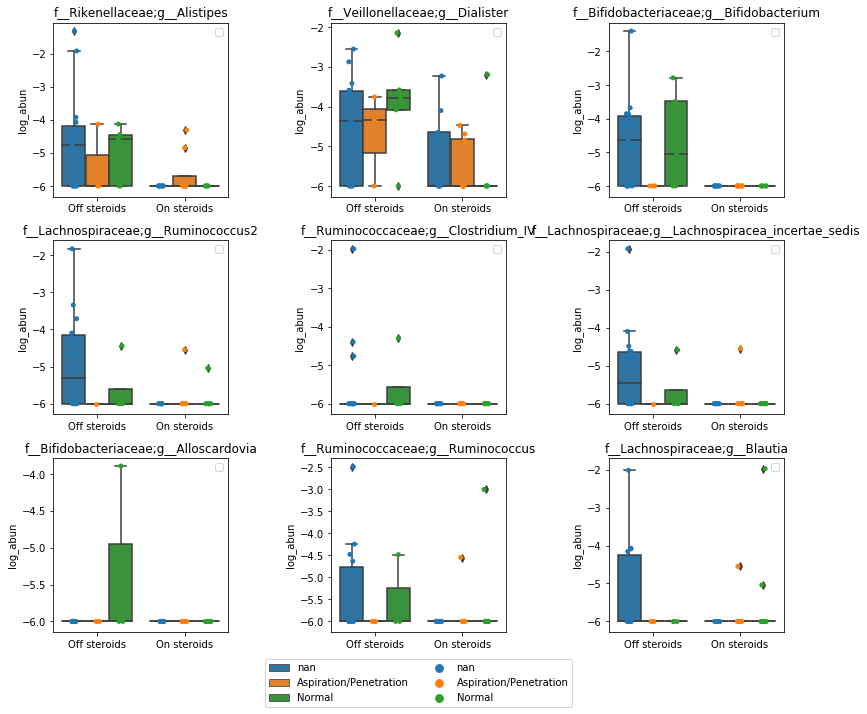

In [131]:
tidygenus['log_abun'] = np.log10(tidygenus['abun'] + 1e-6)

asp_order = ['nan', 'Aspiration/Penetration', 'Normal']

fig, ax = plt.subplots(3, 3, figsize=(12, 10))
ax = ax.flatten()

i = 0
for o in genera:
    tmpdf = tidygenus.query('genus == @o')
    sns.stripplot(data=tmpdf, x='inhaled_steroids_all', y='log_abun',
                  hue='mbs_consolidated', split=True,
                  ax=ax[i], hue_order=asp_order)
    sns.boxplot(data=tmpdf, x='inhaled_steroids_all', y='log_abun',
                  hue='mbs_consolidated',
                  ax=ax[i], hue_order=asp_order)

    if i == 7:
        ax[i].legend(loc='upper center', bbox_to_anchor=(0.5, -0.125), ncol=2)
    else:
        ax[i].legend([])
    
    ax[i].set_xlabel('')
    ax[i].set_xticklabels(['Off steroids', 'On steroids'])
    
    o_label = o.split(';', 4)[-1]
    ax[i].set_title(o_label)
    
    i += 1

fig.tight_layout()

# Pneumonia

In [132]:
fqval = '../../data/analysis/qvalues.kruskal_wallis.pneumonia.txt'

df = pd.read_csv(fqval, sep='\t')
df = df.rename(columns={'n_asp': 'n_pneum', 'n_nml': 'n_no_pneum'})
df.head()

,otu,test-stat,p,q,site,n_pneum,n_no_pneum,total_taxa,level
0,k__Bacteria;p__Firmicutes;c__Negativicutes;o__...,0.805900,0.369335,0.718254,bal,29,69,947,otu
1,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,0.276693,0.598877,0.787339,bal,29,69,947,otu
2,k__Bacteria;p__Actinobacteria;c__Actinobacteri...,2.189912,0.138917,0.718254,bal,29,69,947,otu
3,k__Bacteria;p__Proteobacteria;c__Betaproteobac...,2.655354,0.103202,0.718254,bal,29,69,947,otu
4,k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacill...,0.037239,0.846979,0.923408,bal,29,69,947,otu


In [133]:
# Minimum q-value for all levels
df.groupby(['level', 'site', 'n_pneum', 'n_no_pneum'])['q'].min()

level  site           n_pneum  n_no_pneum
genus  bal            29       69            0.679186
       gastric_fluid  39       101           0.764535
       rectal_swab    0        9             1.000000
       stool          1        24            0.000065
       throat_swab    45       118           0.352968
otu    bal            29       69            0.718254
       gastric_fluid  39       101           0.733590
       rectal_swab    0        9             1.000000
       stool          1        24            0.000091
       throat_swab    45       118           0.587534
Name: q, dtype: float64

# Antibiotics

In [134]:
fqval = '../../data/analysis/qvalues.kruskal_wallis.abx.txt'

df = pd.read_csv(fqval, sep='\t')
df = df.rename(columns={'n_asp': 'n_abx', 'n_nml': 'n_no_abx'})
df.head()

,otu,test-stat,p,q,site,n_abx,n_no_abx,total_taxa,level
0,k__Bacteria;p__Firmicutes;c__Negativicutes;o__...,0.877039,0.349014,0.806658,bal,31,70,950,otu
1,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,0.183389,0.668477,0.864018,bal,31,70,950,otu
2,k__Bacteria;p__Actinobacteria;c__Actinobacteri...,2.304646,0.128988,0.806658,bal,31,70,950,otu
3,k__Bacteria;p__Proteobacteria;c__Betaproteobac...,0.046511,0.829249,0.940079,bal,31,70,950,otu
4,k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacill...,0.685668,0.407642,0.806658,bal,31,70,950,otu


In [135]:
# Minimum q-value for all levels
df.groupby(['level', 'site', 'n_abx', 'n_no_abx'])['q'].min()

level  site           n_abx  n_no_abx
genus  bal            31     70          0.835074
       gastric_fluid  48     97          0.158102
       rectal_swab    0      9           1.000000
       stool          0      25          1.000000
       throat_swab    52     123         0.047866
otu    bal            31     70          0.577683
       gastric_fluid  48     97          0.032543
       rectal_swab    0      9           1.000000
       stool          0      25          1.000000
       throat_swab    52     123         0.002790
Name: q, dtype: float64

In [136]:
cols = ['level', 'site', 'n_abx', 'n_no_abx']
df['sig'] = df['q'] < 0.05
df.groupby(cols)['sig'].sum()

level  site           n_abx  n_no_abx
genus  bal            31     70           0.0
       gastric_fluid  48     97           0.0
       rectal_swab    0      9            0.0
       stool          0      25           0.0
       throat_swab    52     123          8.0
otu    bal            31     70           0.0
       gastric_fluid  48     97           1.0
       rectal_swab    0      9            0.0
       stool          0      25           0.0
       throat_swab    52     123         18.0
Name: sig, dtype: float64

In [137]:
# Grab significant OTUs
otus = df.query('sig == True').query('site == "throat_swab"').query('level == "otu"')['otu'].values

# Tidyfy the OTU table (just keeping these otus in the throat swabs)
tidyotu = (
    otudf[otus]
    .reset_index()
    .melt(id_vars='index', var_name='otu', value_name='abun')
    .rename(columns={'index': 'sample'})
)
meta = pd.read_csv('../../data/clean/rosen.clinical_metadata.clean', sep='\t')
tidyotu = pd.merge(tidyotu, meta, left_on='sample', right_on='sample_id')
tidyotu['mbs_consolidated'] = tidyotu['mbs_consolidated'].fillna('nan')

tidyotu = tidyotu.query('site == "throat_swab"')

tidyotu.head()

,sample,otu,abun,sample_id,subject_id,site,mbs_consolidated,age,gender_all,abx_all,...,foodup_all,chest_pain_all,asthma_all,chronic_cough_all,pneum_all,ear_inf_all,sinus_inf_all,pgsq_symp_all,pgsq_total_all,metadata_id
36,01-112-7TI,k__Bacteria;p__Actinobacteria;c__Actinobacteri...,0.000048,01-112-7TI,01-112-7,throat_swab,nan,1.09589,M,0,...,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.53,0.48,r01_baseline_v2
37,01-112-7TI,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,0.000000,01-112-7TI,01-112-7,throat_swab,nan,1.09589,M,0,...,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.53,0.48,r01_baseline_v2
38,01-112-7TI,k__Bacteria;p__Actinobacteria;c__Actinobacteri...,0.000000,01-112-7TI,01-112-7,throat_swab,nan,1.09589,M,0,...,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.53,0.48,r01_baseline_v2
39,01-112-7TI,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,0.000024,01-112-7TI,01-112-7,throat_swab,nan,1.09589,M,0,...,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.53,0.48,r01_baseline_v2
40,01-112-7TI,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,0.000215,01-112-7TI,01-112-7,throat_swab,nan,1.09589,M,0,...,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.53,0.48,r01_baseline_v2


/Users/claire/anaconda/envs/aspiration/lib/python2.7/site-packages/seaborn/categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/claire/anaconda/envs/aspiration/lib/python2.7/site-packages/seaborn/categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/claire/anaconda/envs/aspiration/lib/python2.7/site-packages/seaborn/categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/claire/anaconda/envs/aspiration/lib/python2.7/site-packages/seaborn/categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/claire/anaconda/envs/aspiration/lib/python2.7/site-packages/seaborn/categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/claire/anaconda/envs/as

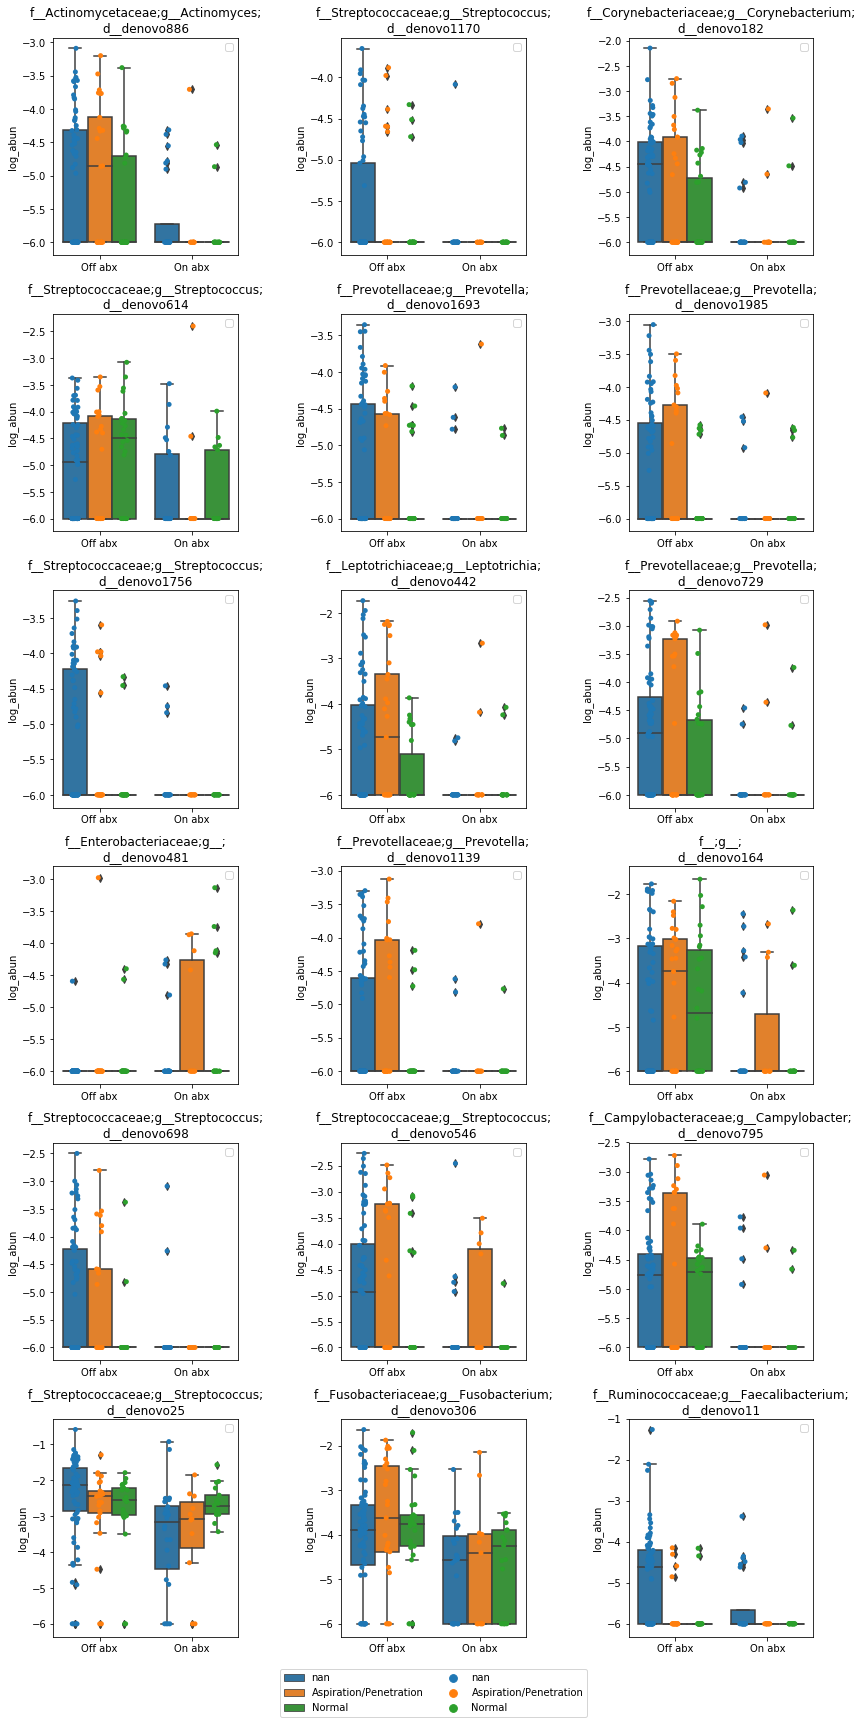

In [144]:
tidyotu['log_abun'] = np.log10(tidyotu['abun'] + 1e-6)

asp_order = ['nan', 'Aspiration/Penetration', 'Normal']

fig, ax = plt.subplots(6, 3, figsize=(12, 24))
ax = ax.flatten()

i = 0
for o in otus:
    tmpdf = tidyotu.query('otu == @o')
    sns.stripplot(data=tmpdf, x='abx_all', y='log_abun',
                  hue='mbs_consolidated', split=True,
                  ax=ax[i], hue_order=asp_order)
    sns.boxplot(data=tmpdf, x='abx_all', y='log_abun',
                  hue='mbs_consolidated',
                  ax=ax[i], hue_order=asp_order)

    if i == 16:
        ax[i].legend(loc='upper center', bbox_to_anchor=(0.5, -0.125), ncol=2)
    else:
        ax[i].legend([])
    
    ax[i].set_xlabel('')
    ax[i].set_xticklabels(['Off abx', 'On abx'])
    
    o_label = '\n'.join(o.split(';', 4)[-1].split('s__;'))
    ax[i].set_title(o_label)
    
    i += 1

fig.tight_layout()